In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
#load & view raw data
df = pd.read_csv("data\insurance_claims.csv")
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.shape

(1000, 40)

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

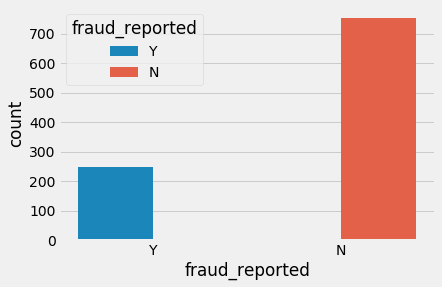

In [7]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

##### From abobe plot, like most fraud datasets, the label distribution is skewed.

In [8]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

##### Here we see that almost 25% fraud reported.  Let’s try to look for an indicative variable. Let’s analyze location. This dataset only has information from the mid-Atlantic states from the USA.

In [9]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

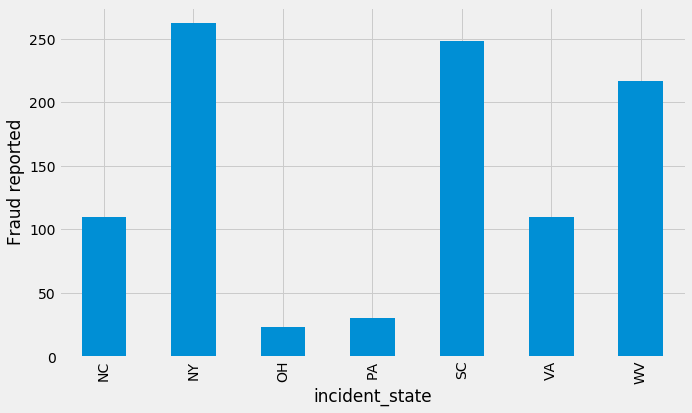

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

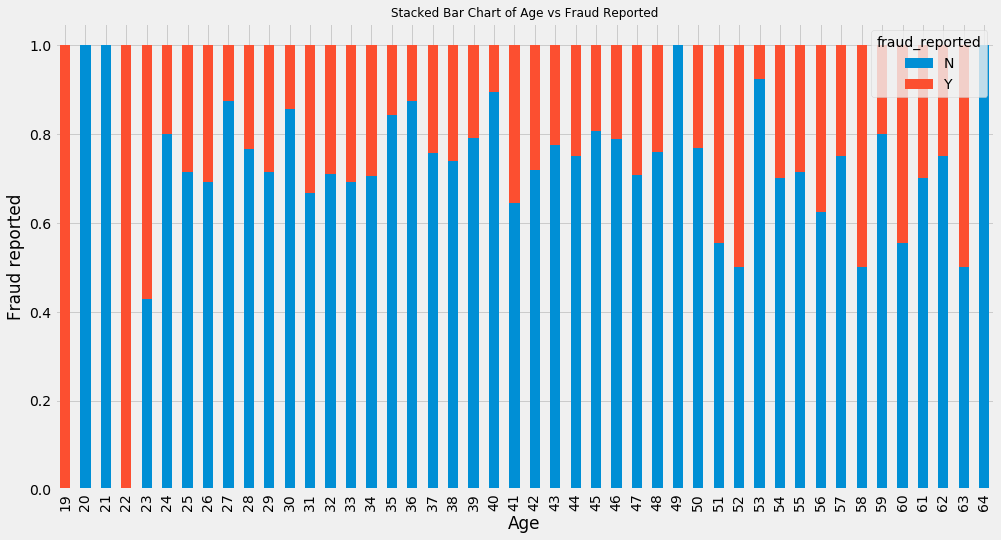

In [11]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

##### From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

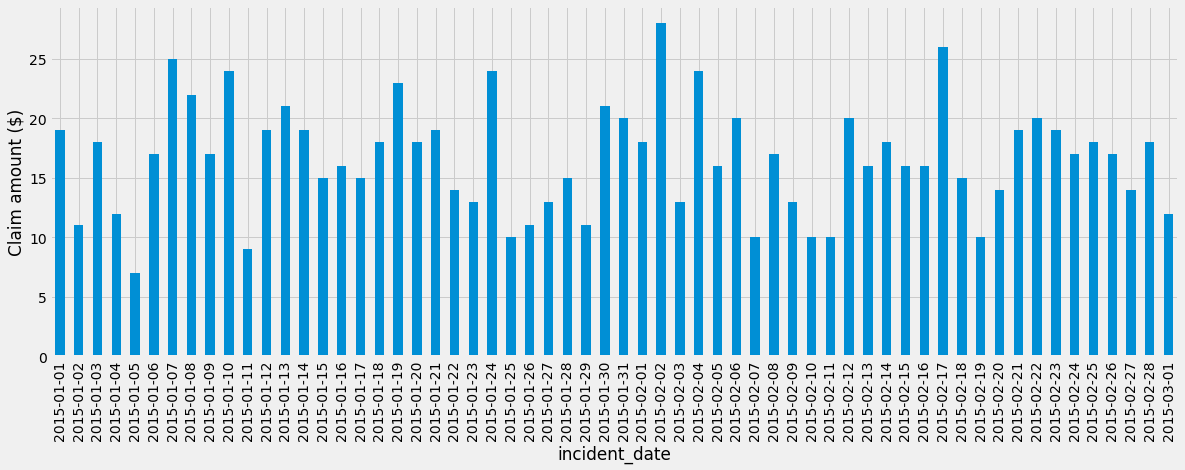

In [12]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

##### We see that, all the cases in above plot are for the months of January and February 2015

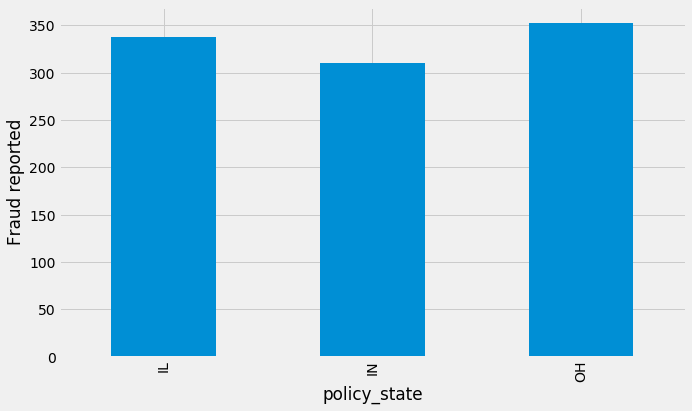

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

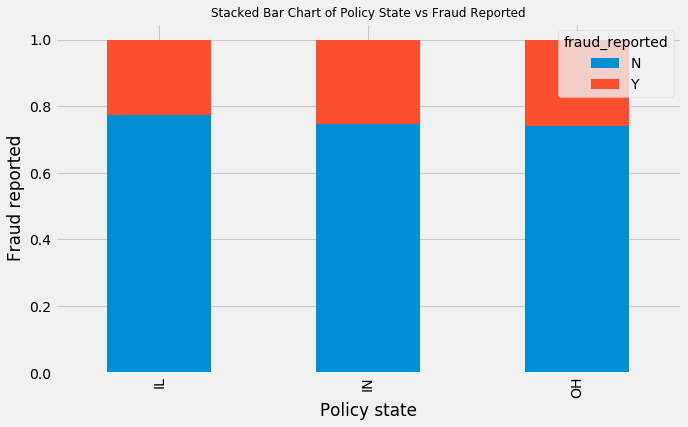

In [14]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()

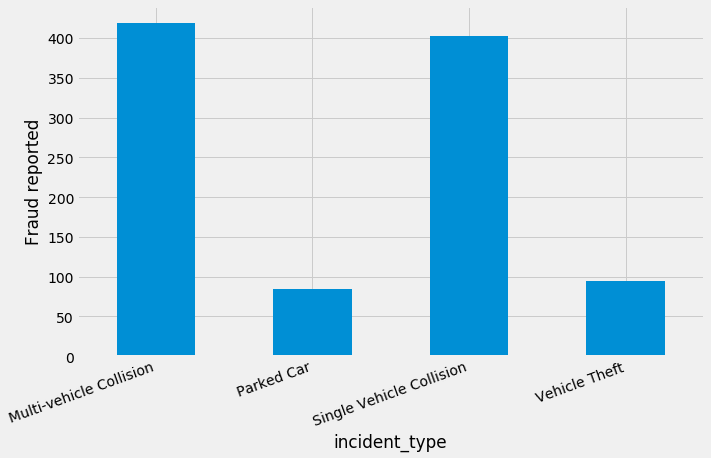

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

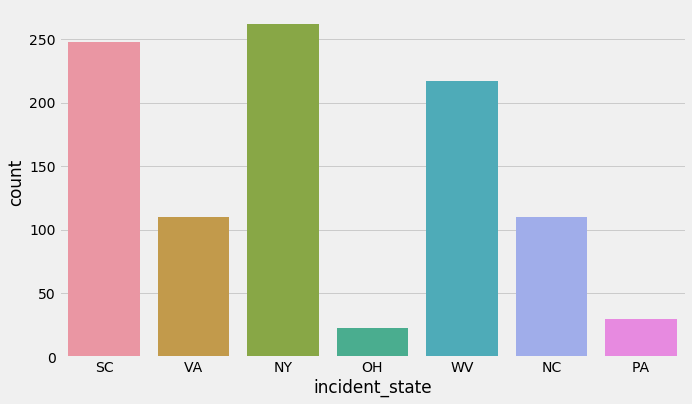

In [16]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

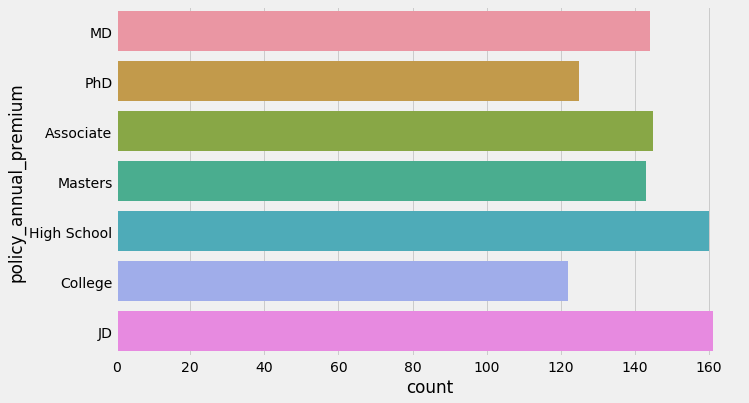

In [17]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

Text(0, 0.5, 'Fraud reported')

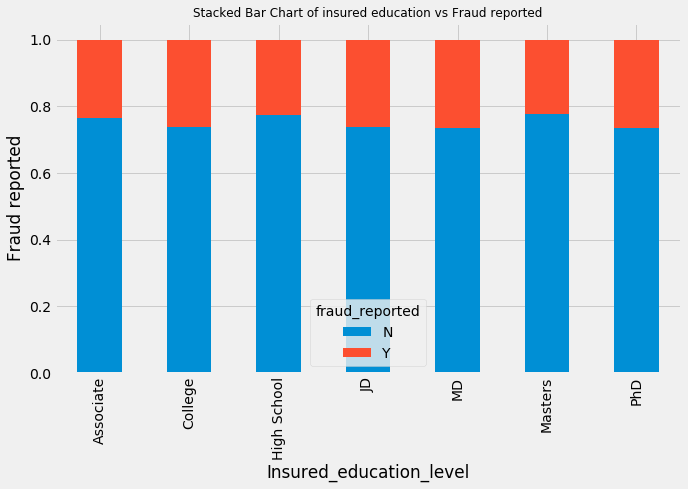

In [18]:
plt.rcParams['figure.figsize'] = [10, 6]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured_education_level')
plt.ylabel('Fraud reported')

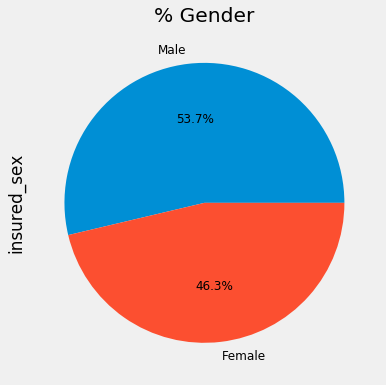

In [19]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

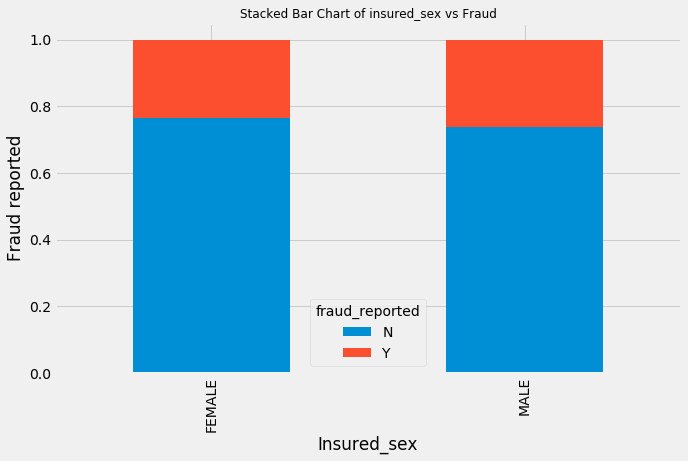

In [20]:
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

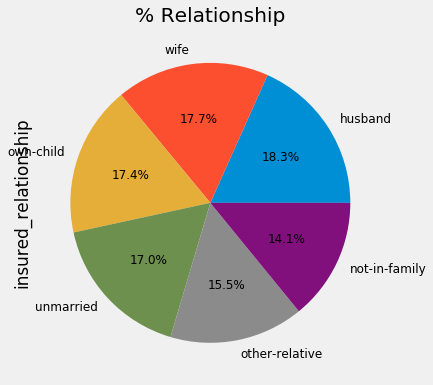

In [21]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

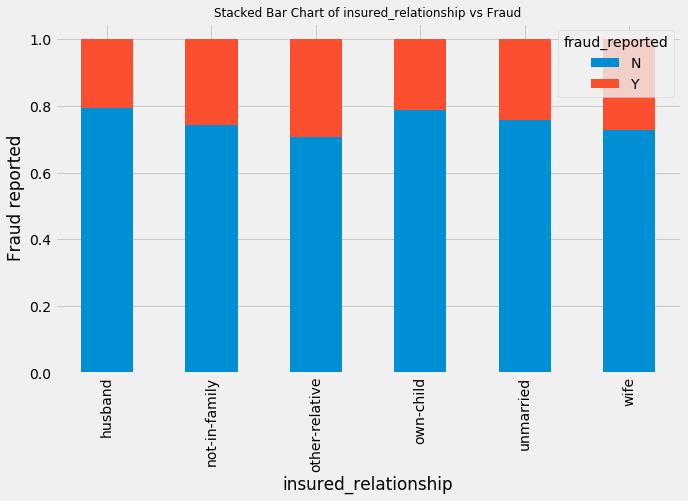

In [22]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('insured_relationship')
plt.ylabel('Fraud reported')
plt.show()

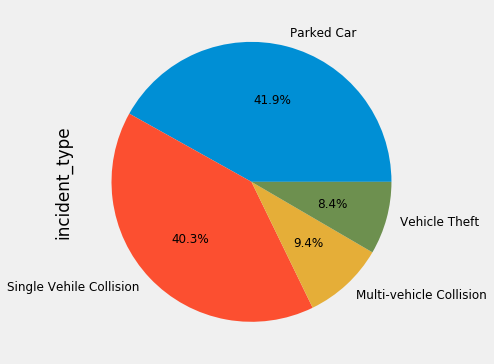

In [23]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

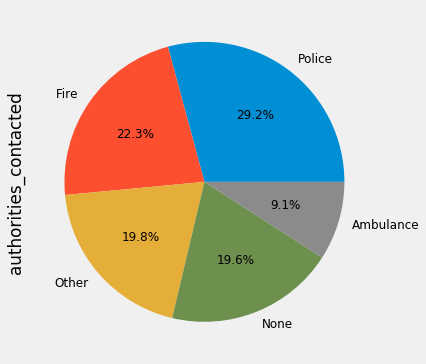

In [24]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

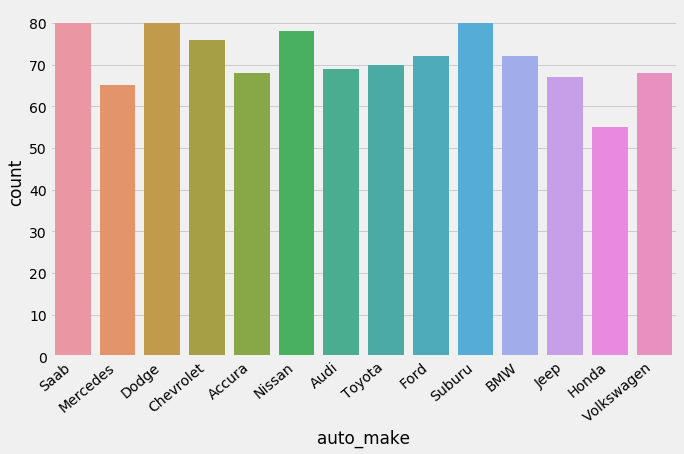

In [25]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

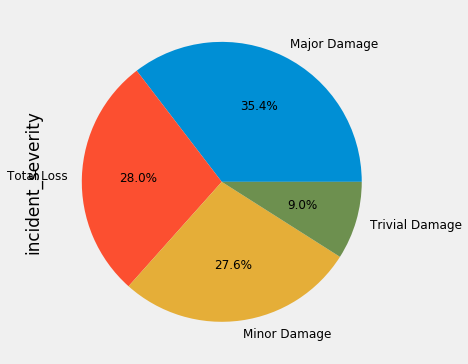

In [26]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

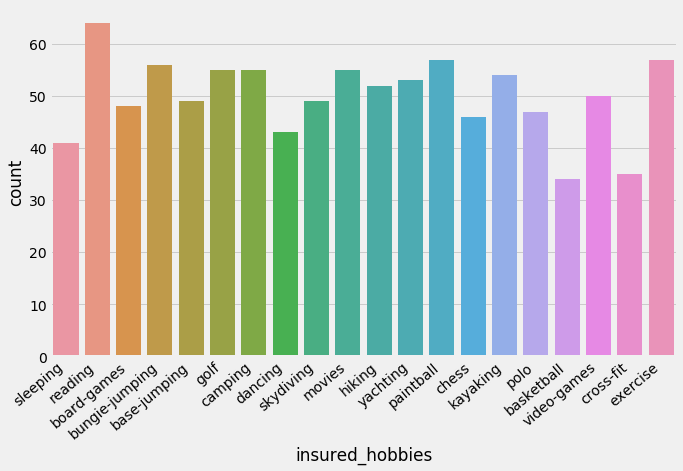

In [27]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [28]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

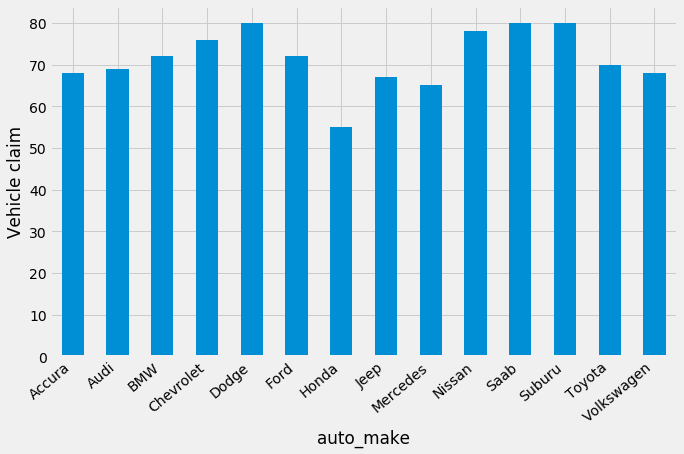

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

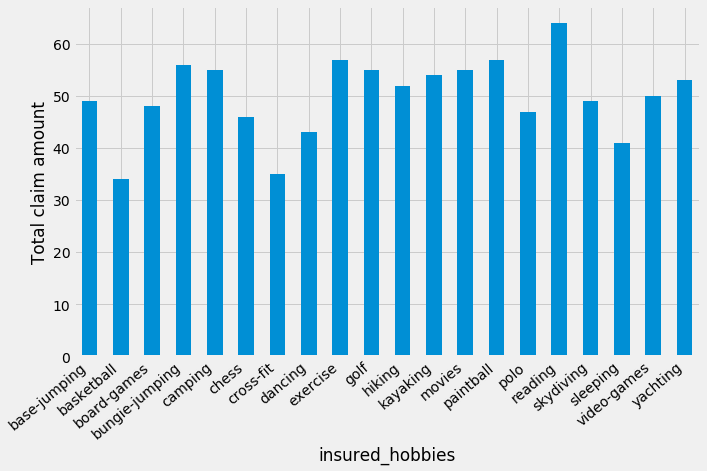

In [30]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


# Data Preprocessing

In [8]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [9]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


# summary of all the column with the object data-type :

In [11]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.0,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,995.0,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN,NaN
top,NaN,NaN,NaN,1992-04-28,OH,250/500,NaN,NaN,NaN,431202.0,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,2015-02-02,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,2193 4th Ridge,NaN,NaN,?,NaN,NaN,NO,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,2.0,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000,NaN


##### Some values in the table are shown here as “NaN”. We will see how to deal with these missing values.

<Figure size 720x432 with 0 Axes>

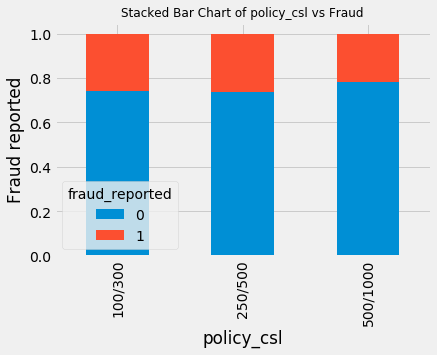

In [7]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
table=pd.crosstab(df.policy_csl, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of policy_csl vs Fraud', fontsize=12)
plt.xlabel('policy_csl')
plt.ylabel('Fraud reported')
plt.show()

In [12]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [9]:
df['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [7]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [39]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [13]:
df['vehicle_age'] = 2021 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    17
1    14
2    14
3     7
4    12
5    18
6     9
7     6
8     9
9    25
Name: vehicle_age, dtype: int64

In [14]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [12]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [15]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,1,250,500,17,early_morning
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,1,250,500,14,morning


In [16]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
csl_per_person             0
csl_per_accident           0
incident_period_of_day     0


# collision_type, property_damage, police_report_available contain many missing values.

In [12]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

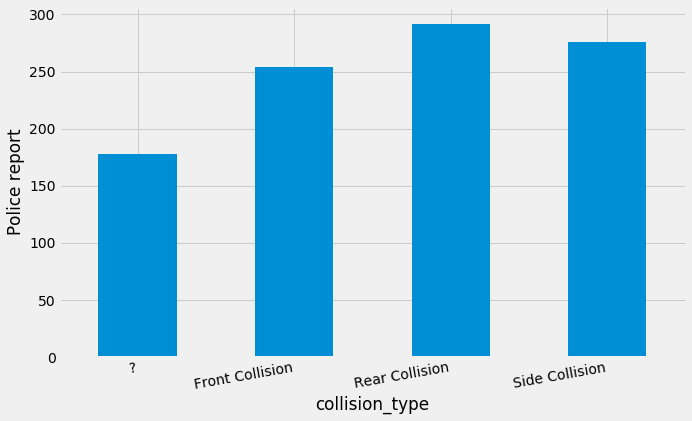

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [14]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

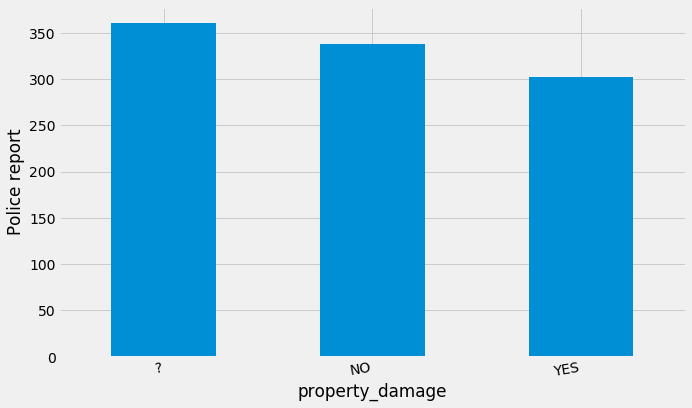

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [17]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [50]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'vehicle_age', 'incident_period_of_day'],
      dtype='object')

In [51]:
df._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [52]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [11]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

#### Applying one-hot encoding to convert all categorical variables except out target variables 
 'collision_type',
 'property_damage',
 'police_report_available',
 'fraud_reported'

In [17]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model', 
    'csl_per_person', 
    'csl_per_accident',
    'incident_period_of_day']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [18]:
X = dummies.iloc[:, 0:-1]  # predictor variables
y = dummies.iloc[:, -1]  # target variable

In [20]:
len(X.columns)

148

In [21]:
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [22]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

#### Label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [20]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10) 

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
X = X.drop(columns = ['collision_type'])
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0

In [63]:
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=164)

In [23]:
X = X.drop(columns = ['fraud_reported'])  # dropping target variable 'fraud_reported'
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=163)

##### We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.841


C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [25]:
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))

Accuracy: 0.84 (+/- 0.07)


# Creating a Training Set for the Data Set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


### Random Forest Classification

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
    
kfold = KFold(n_splits=5, random_state=7)
result2 = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.7725


#### Here, we see that, Random Forest baseline model unable to provide greater accuracy. We will check on ther classifier to compare. Before doing so,let's check if any anomalies/outliers are present in data.

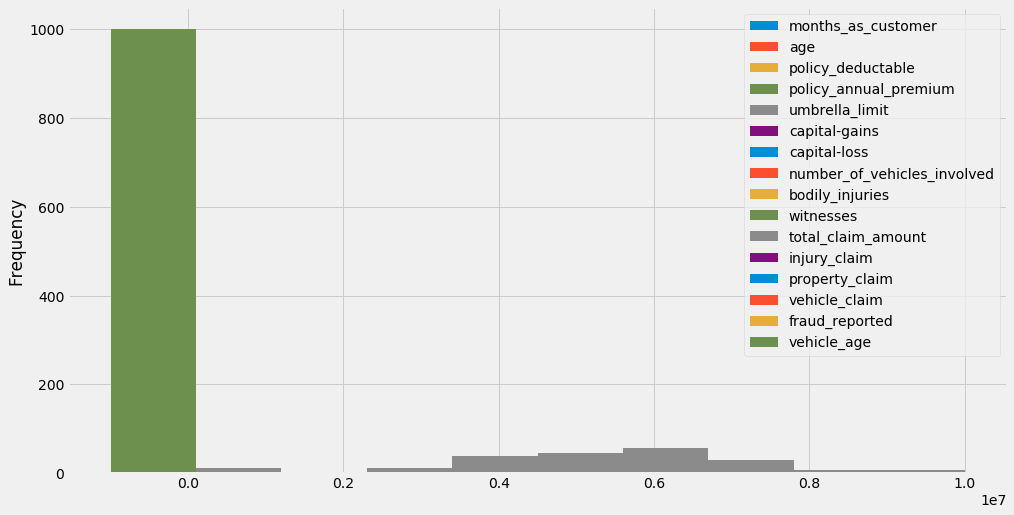

In [30]:
# Generate a Histogram plot for anomaly detection
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15, 8]
df.plot(kind='hist')
plt.show()

### Standardizing the data and recheck the data distribution.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[0.        , 0.        , 2.08816082, ..., 0.90375361, 1.84093195,
        2.30911447],
       [0.        , 0.        , 2.08816082, ..., 2.10117545, 1.60502305,
        2.63898796],
       [0.        , 2.16950399, 0.        , ..., 2.69678424, 2.74665362,
        1.31949398],
       ...,
       [2.11480423, 0.        , 0.        , ..., 1.26980485, 2.58657258,
        4.28835544],
       [0.        , 2.16950399, 0.        , ..., 0.10960856, 0.22327092,
        3.29873495],
       [0.        , 2.16950399, 0.        , ..., 3.29239303, 2.51495738,
        1.64936748]])

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # retaining columns names
X_train_scaled.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0.0,0.0,2.088161,0.0,2.006033,0.0,0.0,2.685971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.660072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.639399,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.624446,0.0,0.0,0.0,0.000000,0.0,2.044498,0.0,0.0,2.083333,0.0,0.0,2.53637

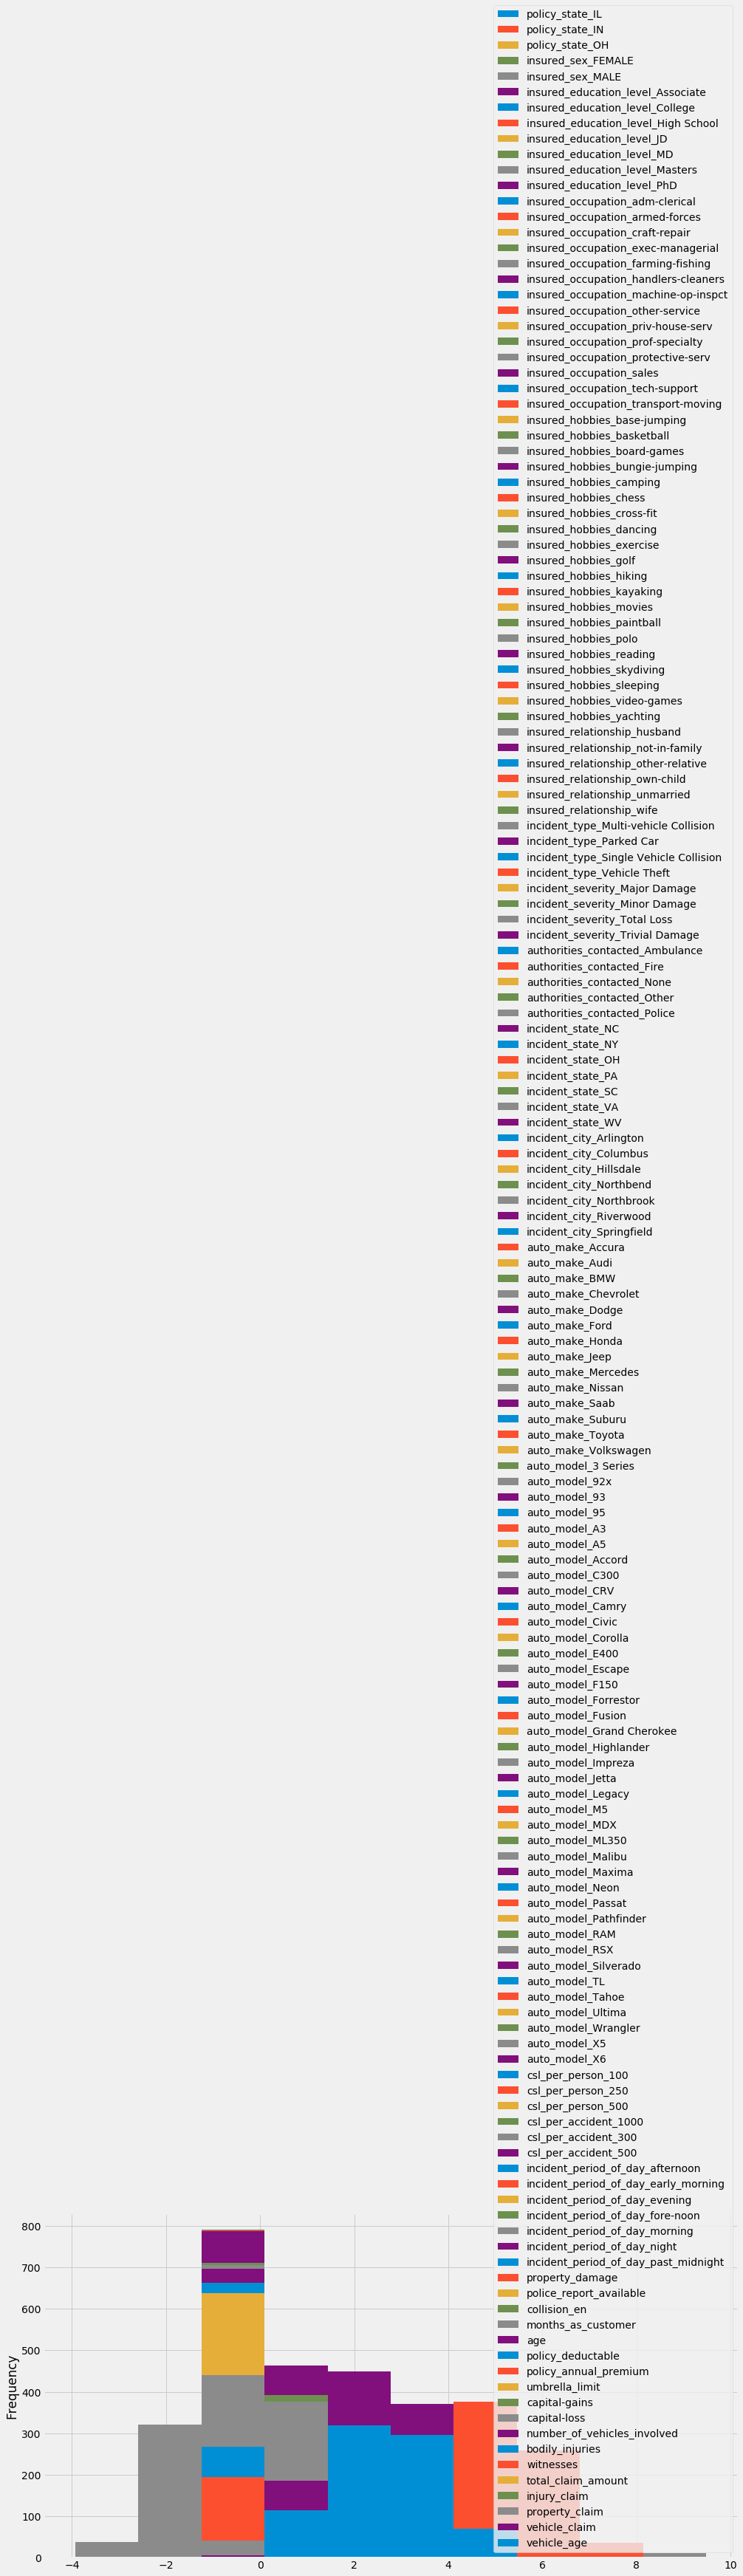

In [34]:
# Generate a Histogram plot on scaled data to check anomalies
plt.rcParams['figure.figsize'] = [15, 8]
X_train_scaled.plot(kind='hist')

In [29]:
x_train_scaled = pd.DataFrame.to_numpy(X_train_scaled) # converting to array for computational ease
x_train_scaled

array([[0.        , 0.        , 2.08816082, ..., 0.90375361, 1.84093195,
        2.30911447],
       [0.        , 0.        , 2.08816082, ..., 2.10117545, 1.60502305,
        2.63898796],
       [0.        , 2.16950399, 0.        , ..., 2.69678424, 2.74665362,
        1.31949398],
       ...,
       [2.11480423, 0.        , 0.        , ..., 1.26980485, 2.58657258,
        4.28835544],
       [0.        , 2.16950399, 0.        , ..., 0.10960856, 0.22327092,
        3.29873495],
       [0.        , 2.16950399, 0.        , ..., 3.29239303, 2.51495738,
        1.64936748]])

#Here the data is distributed and the anomalies are gone after standardization. 

LR: 0.826250 (0.034664)
[23:15:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:02] WARNING: C:/Users/Administrator/wor

C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\U

LDA: 0.840000 (0.029475)
GNB: 0.618750 (0.076291)


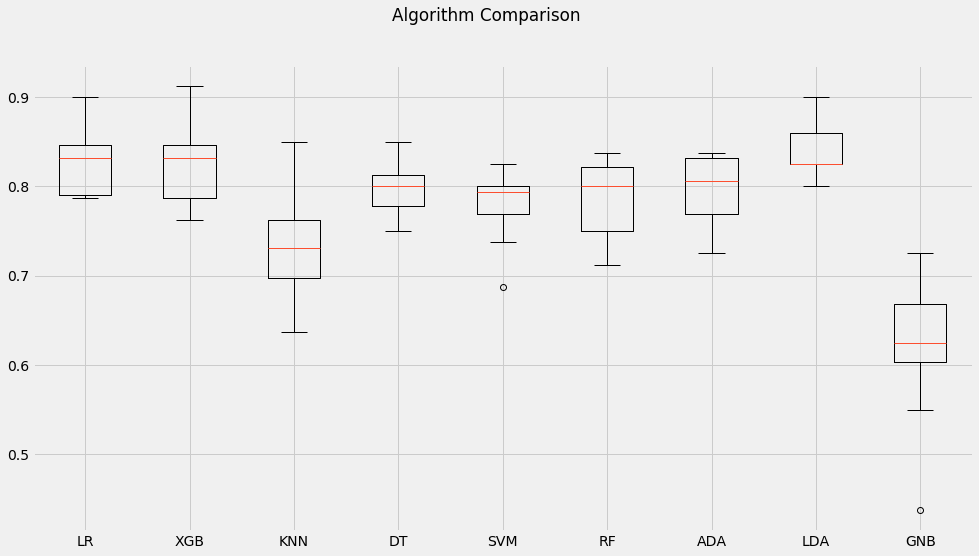

In [30]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

xgb = XGBClassifier(use_label_encoder=False)
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier(use_label_encoder=False)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#  VotingClassifier

In [81]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier() 

clf = [
    ('LR', clf1), 
    ('XGB', clf2)] 
    
#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
    ('LR', clf1), 
    ('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
    'Logistic Regression', 
    'XGB Classifier',
    'Ensemble']):
    
    scores = cross_val_score(clf, x_train_scaled, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))    

Accuracy: 0.83 (+/- 0.03) [Logistic Regression]
Accuracy: 0.82 (+/- 0.03) [XGB Classifier]
Accuracy: 0.81 (+/- 0.03) [Ensemble]


In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
import numpy as np
params_grid=[
    {
        'penalty':['l2'],
        'max_iter':[100,1000,2500,5000],
        'solver':['lbfgs','newton-cg','sag','saga','liblinear'],
        'C':np.logspace(-4,4,20)
        
        
        
        
    }
]

# GRIDSEARCH ON LOGISTIC REGRESSION

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
clf = GridSearchCV(lr, param_grid=params_grid, n_jobs=-1, cv=kfold, verbose=1)
best_clf = clf.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 653 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1020 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3020 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3770 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 10.9min finished
C:\Users\Admin-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
print("Best: %f using %s" % (best_clf.best_score_, best_clf.best_params_))
#means = best_clf_results_['mean_test_score']
#stds = best_clf_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdeviat, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.821250 using {'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [35]:
best_score = clf.best_score_
best_params = clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))


Best score: 0.82125
Best params: 
C: 0.08858667904100823
max_iter: 100
penalty: 'l2'
solver: 'lbfgs'


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score
clf_pred = clf.predict(X_test_scaled)

print('Accuracy: ', round(accuracy_score(y_test, clf_pred)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, clf_pred),3)))
print('Recall: ', round(recall_score(y_test, clf_pred)*100, 2))
#print('\n Classification Report:\n', classification_report(y_test, clf_pred))

#print(result.mean())


Accuracy:  80.5
Cohen Kappa: 0.49
Recall:  62.75


# XGBClassifier-GridSearch

In [38]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
xgb = XGBClassifier(use_label_encoder=False,eval_metric="logloss")
xgb.fit(x_train_scaled, y_train)

# make predictions for test data and evaluate
xgb_pred = xgb.predict(X_test_scaled)
predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_scaled)
    
    # train model
    selection_model = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    xgb_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in xgb_pred]
    accuracy = accuracy_score(y_test, xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80.00%
Thresh=0.000, n=163, Accuracy: 80

#### Let's check the important features the model has identified

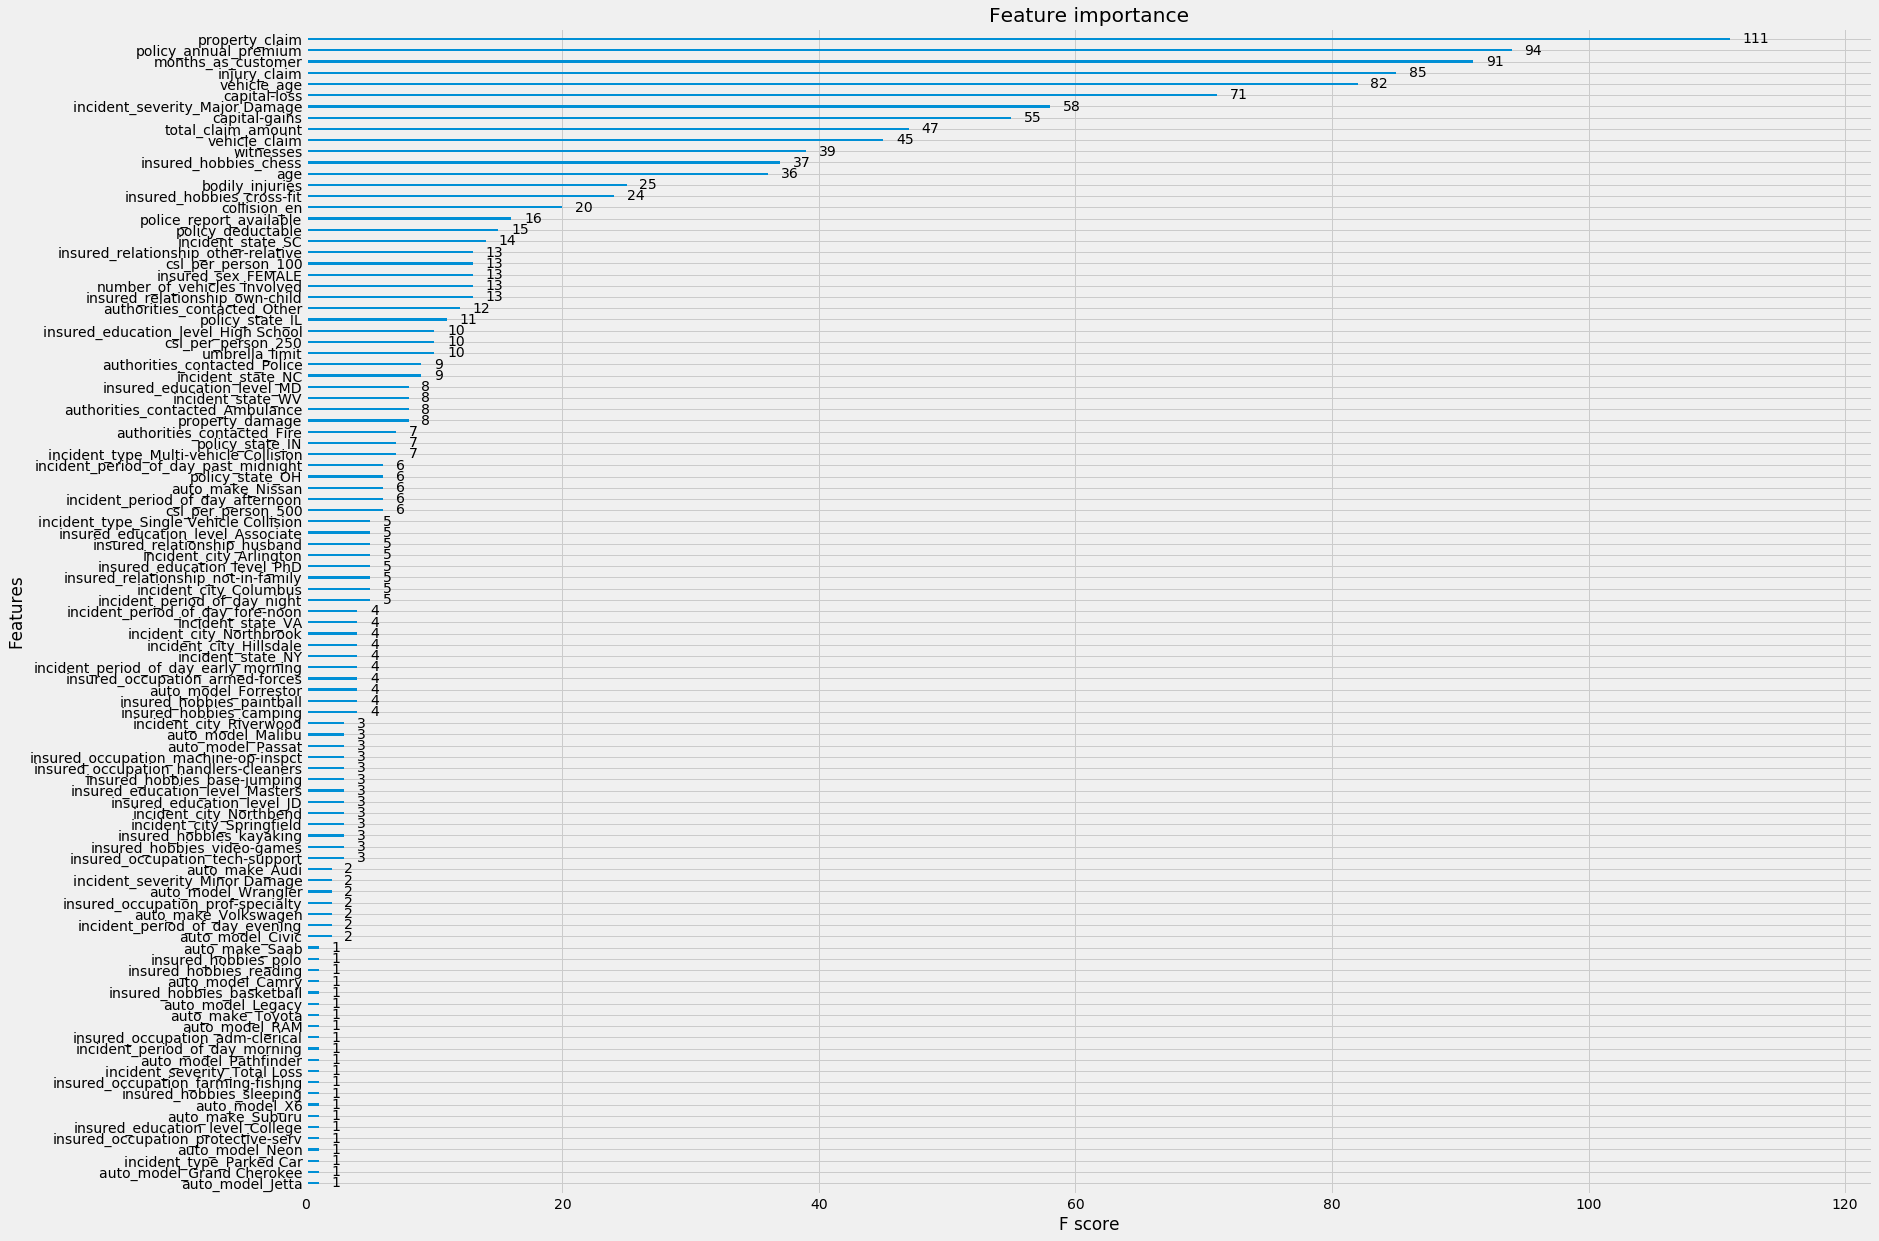

In [39]:
from xgboost import plot_importance
x = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
x.fit(X_train_scaled, y_train) # fitting the model again on dataframe to identify the feature names

plt.rcParams['figure.figsize'] = [25, 20]
# plot feature importance
plot_importance(x)

In [40]:
from pprint import pprint
# Check parameters used 
print('Parameters currently in use:\n')
pprint(x.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'logloss',
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.4s finished


Best: -0.383120 using {'max_depth': 1}
-0.383120 (0.043858) with: {'max_depth': 1}
-0.476557 (0.089864) with: {'max_depth': 3}
-0.539089 (0.108543) with: {'max_depth': 5}
-0.546675 (0.138037) with: {'max_depth': 7}
-0.547161 (0.134629) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

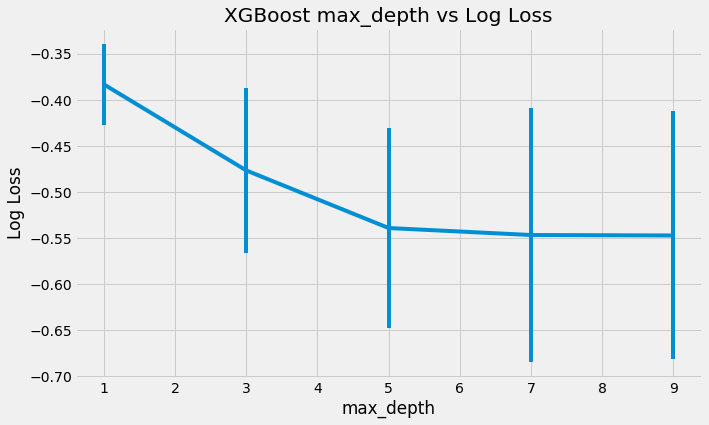

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 6]

# grid search
max_depth = range(1, 11, 2)
print(max_depth)

param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1,  iid=False)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

##### We can see the log loss for each max_depth. The optimal configuration is max_depth=1 resulting in a log loss of 0.365.

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.5min finished


Best: -0.388819 using {'max_depth': 2, 'n_estimators': 50}
-0.388819 (0.054383) with: {'max_depth': 2, 'n_estimators': 50}
-0.430314 (0.065240) with: {'max_depth': 2, 'n_estimators': 100}
-0.463328 (0.072858) with: {'max_depth': 2, 'n_estimators': 150}
-0.485694 (0.087776) with: {'max_depth': 2, 'n_estimators': 200}
-0.446591 (0.112153) with: {'max_depth': 4, 'n_estimators': 50}
-0.532089 (0.139624) with: {'max_depth': 4, 'n_estimators': 100}
-0.594109 (0.147039) with: {'max_depth': 4, 'n_estimators': 150}
-0.626156 (0.150719) with: {'max_depth': 4, 'n_estimators': 200}
-0.492759 (0.095864) with: {'max_depth': 6, 'n_estimators': 50}
-0.564533 (0.100154) with: {'max_depth': 6, 'n_estimators': 100}
-0.595112 (0.109327) with: {'max_depth': 6, 'n_estimators': 150}
-0.618488 (0.118906) with: {'max_depth': 6, 'n_estimators': 200}
-0.491713 (0.108617) with: {'max_depth': 8, 'n_estimators': 50}
-0.547969 (0.114673) with: {'max_depth': 8, 'n_estimators': 100}
-0.574727 (0.120827) with: {'max_de

Text(0, 0.5, 'Log Loss')

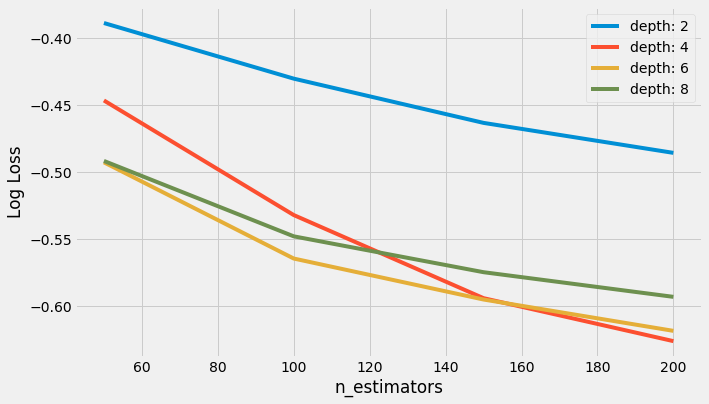

In [42]:
import numpy

n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1, iid=False)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

# RandomSearchCV on XGB

In [44]:
xgb = XGBClassifier(objective='binary:logistic', random_state=7, n_jobs=-1, eval_metric='logloss',use_label_encoder=False)
xgb.fit(x_train_scaled, y_train)
scores = cross_val_score(xgb, x_train_scaled, y_train, cv=kfold, scoring='brier_score_loss')
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: 0.14573


In [45]:
print(xgb.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': 1, 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'eval_metric': 'logloss'}


In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=9)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}
 
# Create the randomised grid search model
# "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=200, cv=kfold, 
                         random_state=7, n_jobs=-1,
                         scoring='brier_score_loss', return_train_score=True)
# Fit rgs
rgs.fit(x_train_scaled, y_train)
 
# Print results
print(rgs)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='logloss', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                      

In [47]:
best_score = rgs.best_score_
best_params = rgs.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.10716933438130738
Best params: 
colsample_bytree: 1.0
learning_rate: 0.01
max_depth: 3
min_child_weight: 3
n_estimators: 200
subsample: 1.0


In [49]:
# make predictions for test data and evaluate
from sklearn.metrics import classification_report
rgs_pred = rgs.predict(X_test_scaled)

print('Accuracy: ', round(accuracy_score(y_test, rgs_pred)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, rgs_pred),3)))
print('Recall: ', round(recall_score(y_test, rgs_pred)*100, 2))
print('\n Classification Report:\n', classification_report(y_test, rgs_pred))

print(result.mean())

Accuracy:  82.0
Cohen Kappa: 0.58
Recall:  84.31

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       149
           1       0.61      0.84      0.70        51

    accuracy                           0.82       200
   macro avg       0.77      0.83      0.79       200
weighted avg       0.85      0.82      0.83       200

0.841


##### The XGB model provides imporved performance with 82%.

In [96]:
xgb = XGBClassifier()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.828750 (0.023083)


In [97]:
# Fit rgs
model.fit(x_train_scaled, y_train)

# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 79.50%


#### In comparison, logreg classifier fitted model accuracy score is 80.5% on test data.

In [98]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, rgs_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.55


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.55')

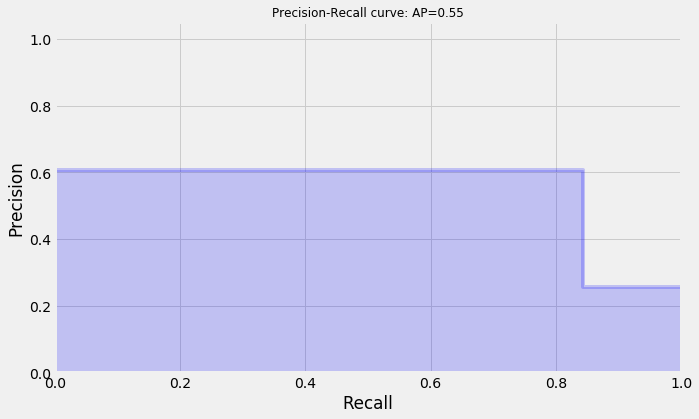

In [99]:
from sklearn.metrics import precision_recall_curve
from inspect import signature

plt.rcParams['figure.figsize'] = [10, 6]

precision, recall, _ = precision_recall_curve(y_test, rgs_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision), fontsize=12)

AUC: 0.828


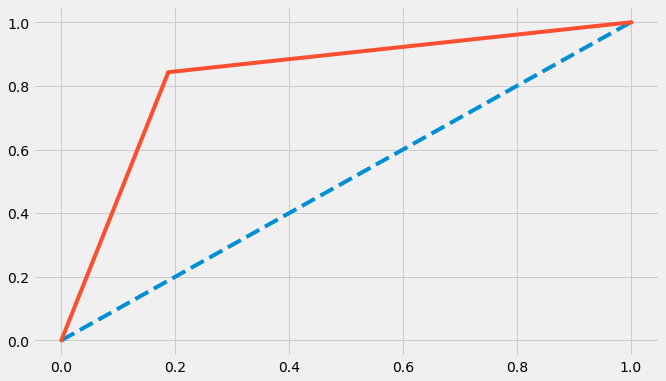

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, rgs_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, rgs_pred)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

##### We see here that, model can measure the correct true negative predictions. The plot of the ROC Curve confirms the AUC interpretation of a skilful model for most probability thresholds.

Confusion matrix
[[121  28]
 [  8  43]]


<Figure size 720x432 with 0 Axes>

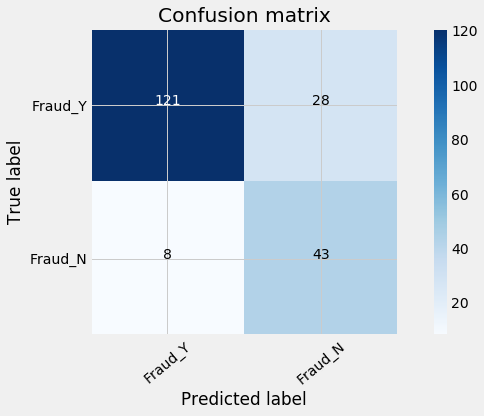

In [101]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rgs_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

From the confusion matrix we see that,
 - 121 transactions were classified as valid that were actually valid
 - 8 transactions were classified as fraud that were actually valid (type 1 error)
 - 28 transactions were classified as valid that were fraud (type 2 error)
 - 43 transactions were classified as fraud that were actually fraud.

Err = {(28+8) / (121+8+28+43)}*100 = 18%

So, the algorithm misclassified 18% fraudulent transactions. 


In [102]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.057) 
constant_filter.fit(X_train_scaled)  

constant_columns = [column for column in X_train_scaled.columns  
                    if column not in X_train_scaled.columns[constant_filter.get_support()]]

print(len(constant_columns)) 

0


##### Let's check the correlated features in the training data.

In [103]:
correlated_features = set()  
correlation_matrix = X_train_scaled.corr()  

for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
len(correlated_features)  

10

In [104]:
print(correlated_features)  

{'csl_per_accident_300', 'vehicle_claim', 'csl_per_accident_500', 'number_of_vehicles_involved', 'auto_model_Wrangler', 'injury_claim', 'csl_per_accident_1000', 'insured_sex_MALE', 'property_claim', 'age'}


#### Important information can be found from the correlated features which is useful for insurance company to view at. So, will check the accuracy dropping these variables.

In [105]:
X.head(1)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3,328,48

In [106]:
x = X.drop([ 
       'vehicle_claim', 
        'injury_claim', 
        'age', 
        'csl_per_accident_500', 
        'csl_per_accident_1000', 
        'auto_model_Wrangler', 
        'insured_sex_MALE', 
        'csl_per_accident_300', 
        'property_claim', 
        'number_of_vehicles_involved'], axis=1)

x.head(1)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,total_claim_amount,vehicle_age
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,3,328,1000,1406.91,0,53300,0,1,2,71610,14


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [108]:
a_train_scaled = scaler.fit_transform(x_train)
a_test_scaled = scaler.transform(x_test)

In [109]:
xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, a_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.822500 (0.037417)
XGB: 0.820000 (0.033166)


###### There is no significant change in performance; so, will keep the fitted XGB model as the final model for this project.